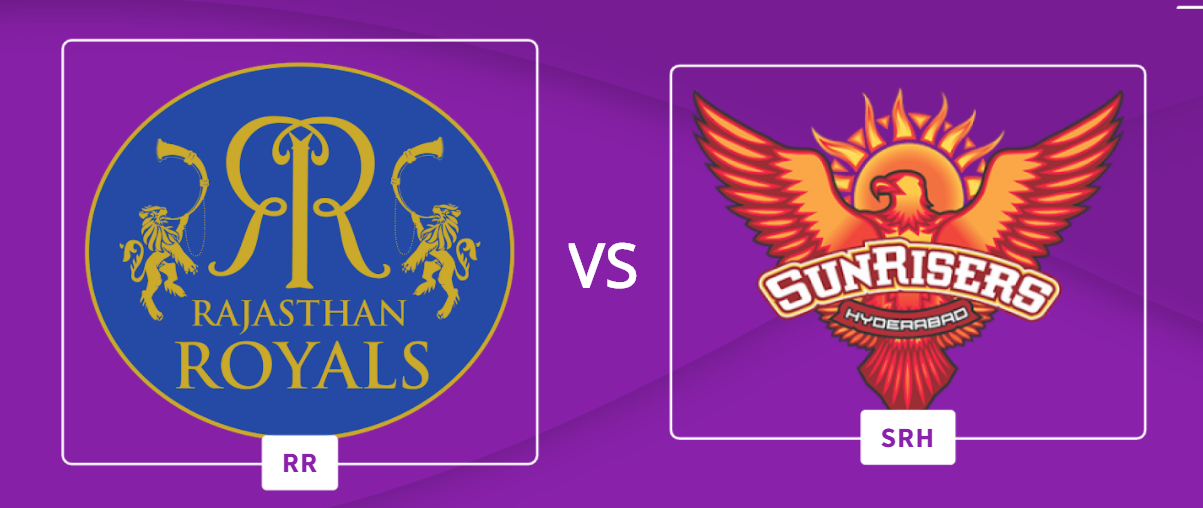

In [88]:
!pip install bqplot

In [89]:
!pip install ipywidgets
!pip install ipympl
!jupyter labextension install @jupyter-widgets/jupyterlab-manager
!jupyter nbextension install --user --py widgetsnbextension
!jupyter nbextension enable --user --py widgetsnbextension
!pip install plotly
!pip install cufflinks


An error occured.
ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
See the log file for details:  C:\Users\sonal\AppData\Local\Temp\jupyterlab-debug-1qdwk52y.log


Installing c:\users\sonal\anaconda3\lib\site-packages\widgetsnbextension\static -> jupyter-js-widgets
Up to date: C:\Users\sonal\AppData\Roaming\jupyter\nbextensions\jupyter-js-widgets\extension.js
Up to date: C:\Users\sonal\AppData\Roaming\jupyter\nbextensions\jupyter-js-widgets\extension.js.map
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable widgetsnbextension --user --py
    
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [90]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go
import bqplot
from bqplot import Pie
from collections import Counter
from bqplot import DateScale, LinearScale, Lines, Axis, Figure
from bqplot import Tooltip
import cufflinks as cf

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
pd.set_option('display.max_columns', 50)
%matplotlib widget



In [91]:
matches = pd.read_csv("matches.csv")
deliveries =  pd.read_csv("deliveries.csv")
IPL_data = pd.merge(deliveries, matches[['id','season', 'team1', 'team2', 'toss_winner', 'toss_decision','winner','result', 'dl_applied','win_by_runs','win_by_wickets', 'venue' ]], 
                    left_on='match_id', right_on='id')

In [92]:
RR_bowlers = ['J Archer' , 'AS Rajpoot', 'S Gopal' , 'JD Unadkat', 'R Tewatia', 'BA Stokes']
RR_batsmen = ['RV Uthappa','BA Stokes', 'SV Samson', 'SPD Smith', 'JC Buttler', 'R Tewatia','J Archer','R Parag']

SRH_batsmen = ['J Bairstow', 'DA Warner', 'MK Pandey', 'JO Holder', 'KS Williamson', 'Mohammad Nabi','V Shankar']
# Samad and Garg no data available
# Williamson injured hence will not likely to play
SRH_bowlers = ['Sandeep Sharma', 'K Ahmed', 'Rashid Khan', 'V Shankar', 'Basil Thampi', 'T Natarajan']

# Question 2: How many balls will Rashid khan bowl to get his first wicket?
Rashid Khan(Leg Spinner) generally bowls in a 6-15 overs,

## 2.1

In [93]:
rk = deliveries[deliveries.bowler == 'Rashid Khan'] 
rk.player_dismissed.fillna(0, inplace = True)
rk_ = rk[["match_id","bowler","batsman_runs", "player_dismissed", "dismissal_kind"]]
rk_.dismissal_kind.fillna(0, inplace = True)
rashid_data = rk_[rk_.dismissal_kind != "run out"]
temp_nw = rk_[rk_.dismissal_kind != "run out"]

rashid_matches= len(rashid_data.match_id.unique()) # total matches where Rashid Khan has bowled (result = 46 matches)


temp_nw['player_dismissed'].loc[temp_nw['player_dismissed'] != 0] = 1 # replace the dismissed player name by 1
no_wickets = temp_nw.groupby(["match_id"])["player_dismissed"].sum().reset_index(name = "no_of_wickets")

# No of matches with zero wickets
zero_wickets = no_wickets[no_wickets.no_of_wickets == 0]
rashid_zero_wickets = zero_wickets.shape[0] # total matches where Rashid Khan has taken zero wickets (result = 10 matches)

# No of matches with more than 1 wicket
wickets_G1 = no_wickets[no_wickets.no_of_wickets > 1]
rashid_wickets_G1 = wickets_G1.shape[0] # total matches where Rashid Khan has taken more than 1 wicket( result = 13 matches)
rashid_wickets_G1_ = wickets_G1.match_id.unique()

# No of matches with exactly 1 wicket
wickets_1 = no_wickets[no_wickets.no_of_wickets == 1]
rashid_wickets_1 = wickets_1.shape[0] # total matches where Rashid Khan has taken exactly 1 wicket( result = 23 matches)
rashid_wickets_1_ = wickets_1.match_id.unique()


# matches with greater than 1 wicket
wickets_G1_data = rashid_data[rashid_data.match_id.isin(rashid_wickets_G1_)]
wickets_G1_data['player_dismissed'].loc[wickets_G1_data['player_dismissed'] != 0] = 1 # replace the dismissed player name by 1

m_id = []
balls = [] # balls required to take 1st wicket by Rashid Khan
for i in wickets_G1_data.match_id.unique():
    x= wickets_G1_data[wickets_G1_data.match_id == i].reset_index()
    n = x[x.player_dismissed!=0].first_valid_index()
    t1 = x[x.index <= n].groupby(['match_id'])['batsman_runs'].count().reset_index()
    m_id.append(t1.match_id.unique()[0])
    balls.append(t1.batsman_runs.values[0])
    

rk1 = pd.DataFrame(list(zip(m_id, balls)), 
               columns =['match_id', 'balls_bowled_for_first_wicket'])


# matches with exactly one wicket
wickets_1_data = rashid_data[rashid_data.match_id.isin(rashid_wickets_1_)]
wickets_1_data['player_dismissed'].loc[wickets_1_data['player_dismissed'] != 0] = 1 # replace the dismissed player name by 1

m_id1 = []
balls1 = [] # balls required to take 1st wicket by Rashid Khan
for i in wickets_1_data.match_id.unique():
    x1 = wickets_1_data[wickets_1_data.match_id == i].reset_index()
    n1 = x1[x1.player_dismissed!=0].first_valid_index()
    t2 = x1[x1.index <= n1].groupby(['match_id'])['batsman_runs'].count().reset_index()
    m_id1.append(t2.match_id.unique()[0])
    balls1.append(t2.batsman_runs.values[0])
    
rk2 = pd.DataFrame(list(zip(m_id1, balls1)), 
               columns =['match_id', 'balls_bowled_for_first_wicket'])
f = [rk1, rk2]
rashid_wickets_final_data = pd.concat(f)
rashid_wickets_final_data_ = rashid_wickets_final_data.reset_index()

fig = px.bar(rashid_wickets_final_data_, x=rashid_wickets_final_data_.index, y='balls_bowled_for_first_wicket',
             hover_data=['match_id','balls_bowled_for_first_wicket' ],color = 'balls_bowled_for_first_wicket',title=' Figure1 : Number of balls Rashid Khan took to take his first wicket matchwise')
fig.show()

print("################################################################################################################")
print("Maximum balls Rashid Khan took to take first wicket: ", rashid_wickets_final_data_.balls_bowled_for_first_wicket.max())
print("################################################################################################################")
print("Minimum balls Rashid Khan took to take first wicket: ", rashid_wickets_final_data_.balls_bowled_for_first_wicket.min())
print("################################################################################################################")
print("Average number of  balls Rashid Khan took to take first wicket: ", rashid_wickets_final_data_.balls_bowled_for_first_wicket.median())
print("################################################################################################################")
print("frequnt number of balls Rashid Khan took to take first wicket:\n",rashid_wickets_final_data_.balls_bowled_for_first_wicket.mode())
print("################################################################################################################")
print("Possibility of Rashid khan not taking any wicket in a match: ", (rashid_zero_wickets/rashid_matches)*100)
print("################################################################################################################")
print("Possibility of Rashid khan taking equal to or more than 1 wicket in a match: ", ((rashid_wickets_G1 + rashid_wickets_1)/rashid_matches)*100)
print("################################################################################################################")
list1 = [(rashid_zero_wickets/rashid_matches)*100, (rashid_wickets_G1/rashid_matches)*100, (rashid_wickets_1/rashid_matches)*100]
list2 = ["No wickets", "More than 1 Wicket", "Exactly 1 Wicket"]

################################################################################################################
Maximum balls Rashid Khan took to take first wicket:  25
################################################################################################################
Minimum balls Rashid Khan took to take first wicket:  1
################################################################################################################
Average number of  balls Rashid Khan took to take first wicket:  12.5
################################################################################################################
frequnt number of balls Rashid Khan took to take first wicket:
 0     5
1    11
2    21
dtype: int64
################################################################################################################
Possibility of Rashid khan not taking any wicket in a match:  21.73913043478261
#######################################################################


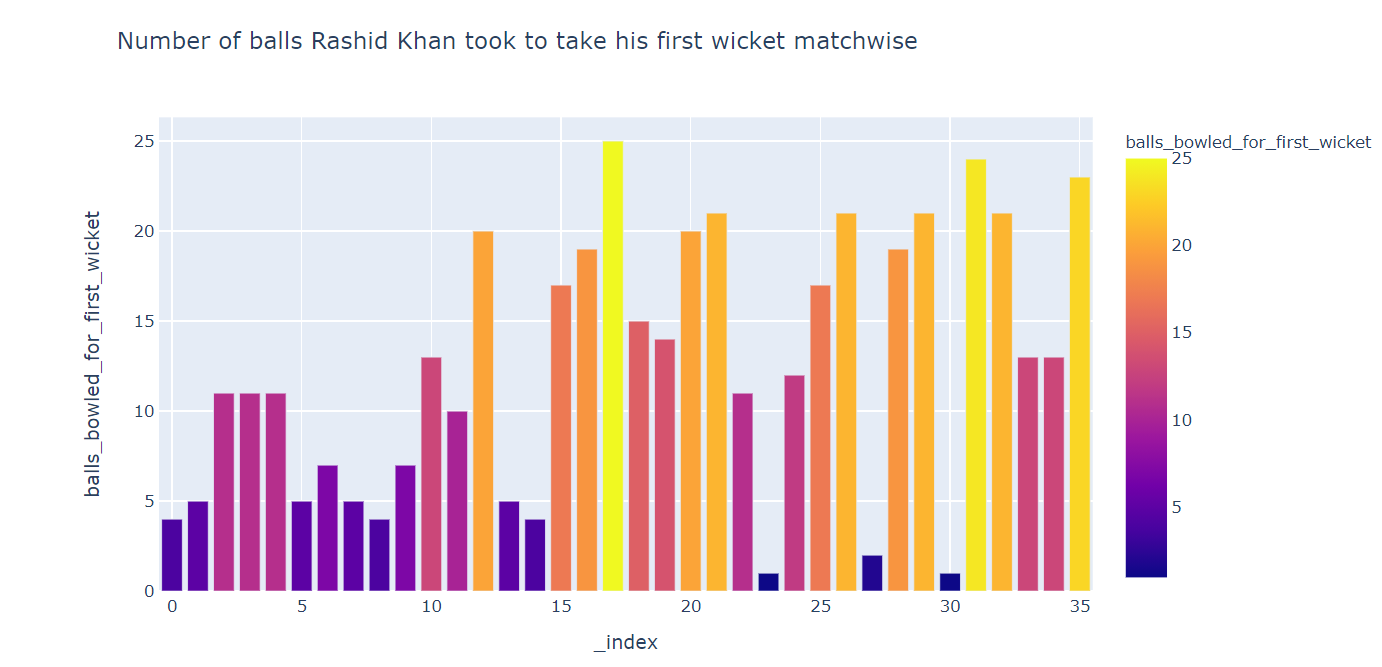

In [94]:
from bqplot import Pie
from collections import Counter
from bqplot import DateScale, LinearScale, Lines, Axis, Figure
from bqplot import Tooltip

pie = Pie(sizes=list(list1), labels=list(list2),
          colors=["tomato", "lime", "dodgerblue"], stroke="black",
          opacities = [0.8, 0.8, 0.8],
          radius=180, inner_radius=80,
          sort=True,
          display_values=True, values_format='0.0f',
          label_color="white", font_size="16px", font_weight="bolder"
          )

fig = Figure(marks=[pie],
             legend_location = "top",
             title=" Figure 2: Wickets taken by Rashid Khan in IPL (in %)",
             fig_margin= dict(top=60, bottom=40, left=50, right=20),
             background_style = {"fill":"black"}

      )

fig.layout.width="800px"
fig.layout.height="500px"

pie.tooltip = Tooltip(fields=['sizes'], labels=["Count"], formats=["0.1f"])

fig

Figure(background_style={'fill': 'black'}, fig_margin={'top': 60, 'bottom': 40, 'left': 50, 'right': 20}, layo…

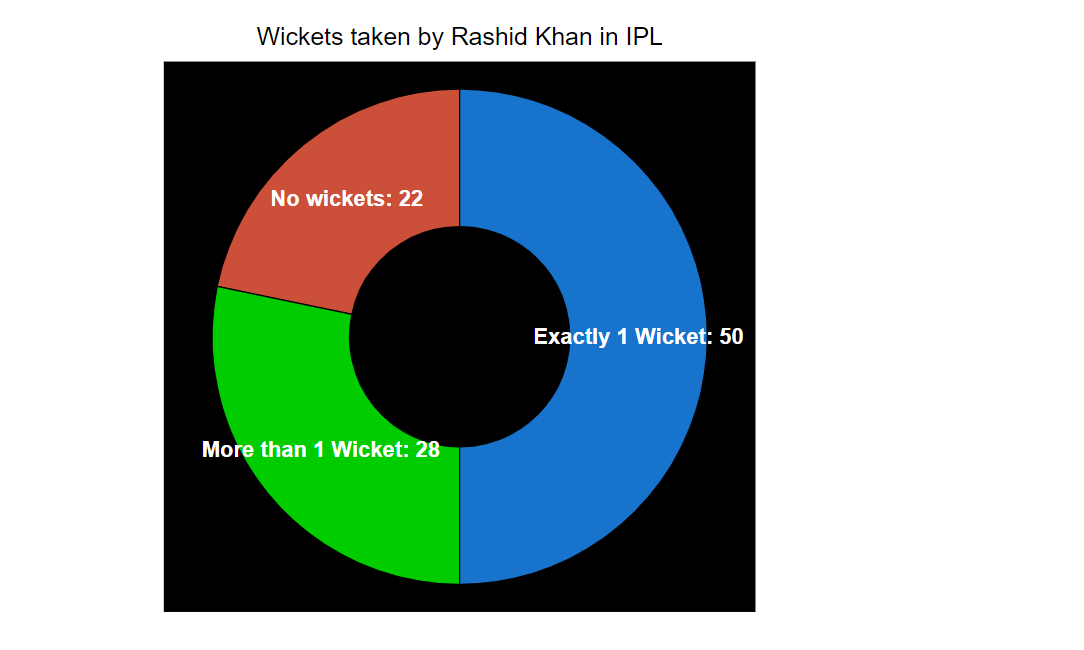

## 2.2 Against RR Batsmen

In [95]:
rk_ = deliveries[(deliveries.bowler == 'Rashid Khan') & (deliveries.batsman.isin(RR_batsmen))] 
rk_.player_dismissed.fillna(0, inplace = True)
rk_1 = rk_[["match_id","bowler","batsman_runs", "player_dismissed", "dismissal_kind"]]
rk_1.dismissal_kind.fillna(0, inplace = True)
rashid_data_ = rk_1[rk_1.dismissal_kind != "run out"]
temp_nw_ = rk_1[rk_1.dismissal_kind != "run out"]

rashid_matches_ = len(rashid_data_.match_id.unique()) # total matches where Rashid Khan has bowled (result = 46 matches)


temp_nw_['player_dismissed'].loc[temp_nw_['player_dismissed'] != 0] = 1 # replace the dismissed player name by 1
no_wickets_ = temp_nw_.groupby(["match_id"])["player_dismissed"].sum().reset_index(name = "no_of_wickets")

# No of matches with zero wickets
zero_wickets_ = no_wickets_[no_wickets_.no_of_wickets == 0]
rashid_zero_wickets_ = zero_wickets_.shape[0] # total matches where Rashid Khan has taken zero wickets (result = 10 matches)

# No of matches with more than 1 wicket
wickets_G1_ = no_wickets_[no_wickets_.no_of_wickets > 1]
rashid_wickets_G1_ = wickets_G1_.shape[0] # total matches where Rashid Khan has taken more than 1 wicket( result = 13 matches)
rashid_wickets_G1_1 = wickets_G1_.match_id.unique()

# No of matches with exactly 1 wicket
wickets_1_ = no_wickets_[no_wickets_.no_of_wickets == 1]
rashid_wickets_1_ = wickets_1_.shape[0] # total matches where Rashid Khan has taken exactly 1 wicket( result = 23 matches)
rashid_wickets_1_1 = wickets_1_.match_id.unique()


# matches with greater than 1 wicket
wickets_G1_data_ = rashid_data_[rashid_data_.match_id.isin(rashid_wickets_G1_1)]
wickets_G1_data_['player_dismissed'].loc[wickets_G1_data_['player_dismissed'] != 0] = 1 # replace the dismissed player name by 1

m_id_ = []
balls_ = [] # balls required to take 1st wicket by Rashid Khan
for i in wickets_G1_data_.match_id.unique():
    x_ = wickets_G1_data_[wickets_G1_data_.match_id == i].reset_index()
    n_ = x_[x_.player_dismissed!=0].first_valid_index()
    t1_ = x_[x_.index <= n_].groupby(['match_id'])['batsman_runs'].count().reset_index()
    m_id_.append(t1_.match_id.unique()[0])
    balls_.append(t1_.batsman_runs.values[0])
    

rk1_ = pd.DataFrame(list(zip(m_id_, balls_)), 
               columns =['match_id', 'balls_bowled_for_first_wicket'])


# matches with exactly one wicket
wickets_1_data_ = rashid_data_[rashid_data_.match_id.isin(rashid_wickets_1_1)]
wickets_1_data_['player_dismissed'].loc[wickets_1_data_['player_dismissed'] != 0] = 1 # replace the dismissed player name by 1

m_id1_ = []
balls1_ = [] # balls required to take 1st wicket by Rashid Khan
for i in wickets_1_data_.match_id.unique():
    x1_ = wickets_1_data_[wickets_1_data_.match_id == i].reset_index()
    n1_ = x1_[x1_.player_dismissed!=0].first_valid_index()
    t2_ = x1_[x1_.index <= n1_].groupby(['match_id'])['batsman_runs'].count().reset_index()
    m_id1_.append(t2_.match_id.unique()[0])
    balls1_.append(t2_.batsman_runs.values[0])
    
rk2_ = pd.DataFrame(list(zip(m_id1_, balls1_)), 
               columns =['match_id', 'balls_bowled_for_first_wicket'])
f_ = [rk1_, rk2_]
rashid_wickets_final_data_ = pd.concat(f_)
rashid_wickets_final_data_1 = rashid_wickets_final_data_.reset_index()
bar_ = rashid_wickets_final_data_1[['match_id','balls_bowled_for_first_wicket']]

fig1 = px.bar(bar_, y=bar_.index, x='balls_bowled_for_first_wicket',
             hover_data=['match_id','balls_bowled_for_first_wicket' ],color = 'match_id',
              title=' Figure 3: Number of balls Rashid Khan took to take his first wicket against RR batsmen')
fig1.show()

print("################################################################################################################")
print("Maximum balls Rashid Khan took to take first wicket: ", rashid_wickets_final_data_1.balls_bowled_for_first_wicket.max())
print("################################################################################################################")
print("Minimum balls Rashid Khan took to take first wicket: ", rashid_wickets_final_data_1.balls_bowled_for_first_wicket.min())
print("################################################################################################################")
print("Average number of  balls Rashid Khan took to take first wicket: ", rashid_wickets_final_data_1.balls_bowled_for_first_wicket.median())
print("################################################################################################################")
print("Possibility of Rashid khan not taking any wicket in a match: ", (rashid_zero_wickets_/rashid_matches_)*100)
print("################################################################################################################")
print("Possibility of Rashid khan taking equal to or more than 1 wicket in a match: ", ((rashid_wickets_G1_ + rashid_wickets_1_)/rashid_matches_)*100)
print("################################################################################################################")
#list1_ = [(rashid_zero_wickets_/rashid_matches_)*100, (rashid_wickets_G1_/rashid_matches_)*100, (rashid_wickets_1_/rashid_matches_)*100]
#list2_ = ["No wickets", "More than 1 Wicket", "Exactly 1 Wicket"]
rashid_wickets_final_data_1

################################################################################################################
Maximum balls Rashid Khan took to take first wicket:  13
################################################################################################################
Minimum balls Rashid Khan took to take first wicket:  1
################################################################################################################
Average number of  balls Rashid Khan took to take first wicket:  8.0
################################################################################################################
Possibility of Rashid khan not taking any wicket in a match:  50.0
################################################################################################################
Possibility of Rashid khan taking equal to or more than 1 wicket in a match:  50.0
#######################################################################################################

,index,match_id,balls_bowled_for_first_wicket
0,0,25,10
1,1,43,13
2,2,7897,11
3,3,7921,6
4,4,7952,1
5,5,11144,2


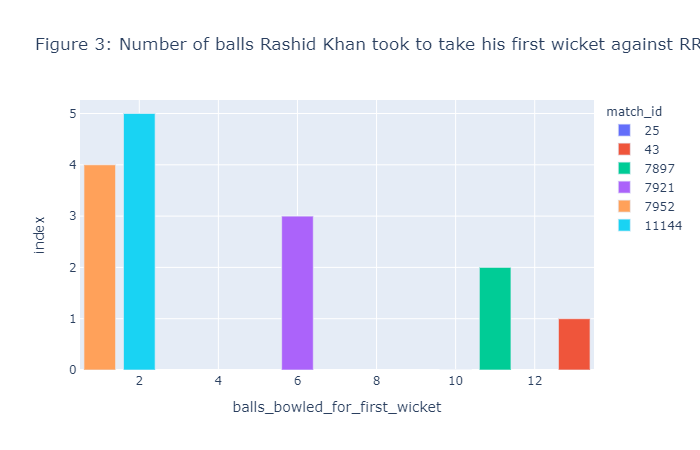

## Conclusion: From 2.1 and 2.2 Rashid Khan would take 8- 13 ball to take his 1st wicket

# Question 3: How will David Warner Get out?

## 3.1 : Overall Wickets

In [96]:
# SRH batsman 'DA Warner'
DW  = deliveries[deliveries.batsman == 'DA Warner']
DW.player_dismissed.fillna(0, inplace = True)
DW_matches =len(DW.match_id.unique()) # number of matches played by DA Warner(126)
DW_ = DW[DW.player_dismissed == 'DA Warner']
DW_out_matches = DW_.shape[0] #Number of times DA Warner got out in a match(108)

fig3 = plt.gcf()
fig3.set_size_inches(15,7)
sns.countplot(x = "player_dismissed", hue = "dismissal_kind", data = DW_)
plt.xticks(fontsize=11.5)
plt.yticks(fontsize=16)
plt.xlabel('',fontsize=0)
plt.ylabel('Wickets Count',fontsize=20)
plt.title('Figure 4: Wickets of DA Warner',fontsize=15)

plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

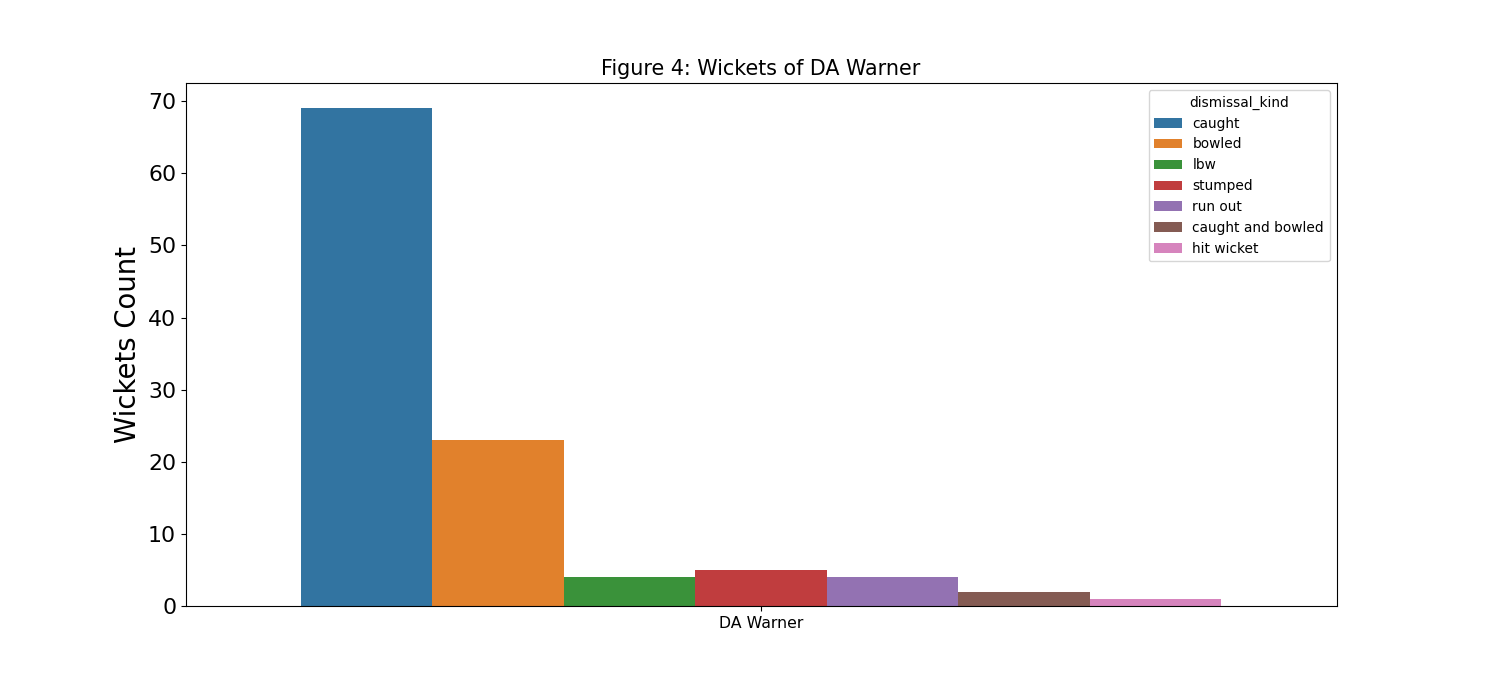

In [97]:
DW_out_p = (DW_out_matches/DW_matches)*100 # DA Warner's out percentage
print("Total out percentage of DA Warner among the matches he played : ", DW_out_p)
print("###############################################################################################################")
percentage = []
dismissal_kind = []
for i in DW_.dismissal_kind.unique():
    w = (DW_[DW_.dismissal_kind == i].shape[0]/DW_out_matches)*100
    percentage.append(w)
    dismissal_kind.append(i)
    print("\nprint out percentage due to dismissal kind ", i, "is : ", w)
    print("\n###############################################################################################################")

Total out percentage of DA Warner among the matches he played :  85.71428571428571
###############################################################################################################

print out percentage due to dismissal kind  caught is :  63.888888888888886

###############################################################################################################

print out percentage due to dismissal kind  bowled is :  21.296296296296298

###############################################################################################################

print out percentage due to dismissal kind  lbw is :  3.7037037037037033

###############################################################################################################

print out percentage due to dismissal kind  stumped is :  4.62962962962963

###############################################################################################################

print out percentage due to dismissal kind  run 

In [98]:
from bqplot import Pie
from collections import Counter
from bqplot import DateScale, LinearScale, Lines, Axis, Figure
from bqplot import Tooltip

pie = Pie(sizes=list(percentage), labels=list(dismissal_kind),
          stroke="black",
          opacities = [1, 0.8, 0.8],
          radius=200, inner_radius=100,
          sort=True,
          display_values=True, values_format='0.0f',
          label_color="white", font_size="14px"
          )

fig = Figure(marks=[pie],
             legend_location = "bottom",
             title=" Figure 5: Dismissal kind of DA Warner in IPL (in %)",
             fig_margin= dict(top=40, bottom=20, left=50, right=20),
             background_style = {"fill":"grey"}

      )

fig.layout.width="800px"
fig.layout.height="500px"

pie.tooltip = Tooltip(fields=['sizes'], labels=["Count"], formats=["0.1f"])

fig

Figure(background_style={'fill': 'grey'}, fig_margin={'top': 40, 'bottom': 20, 'left': 50, 'right': 20}, layou…

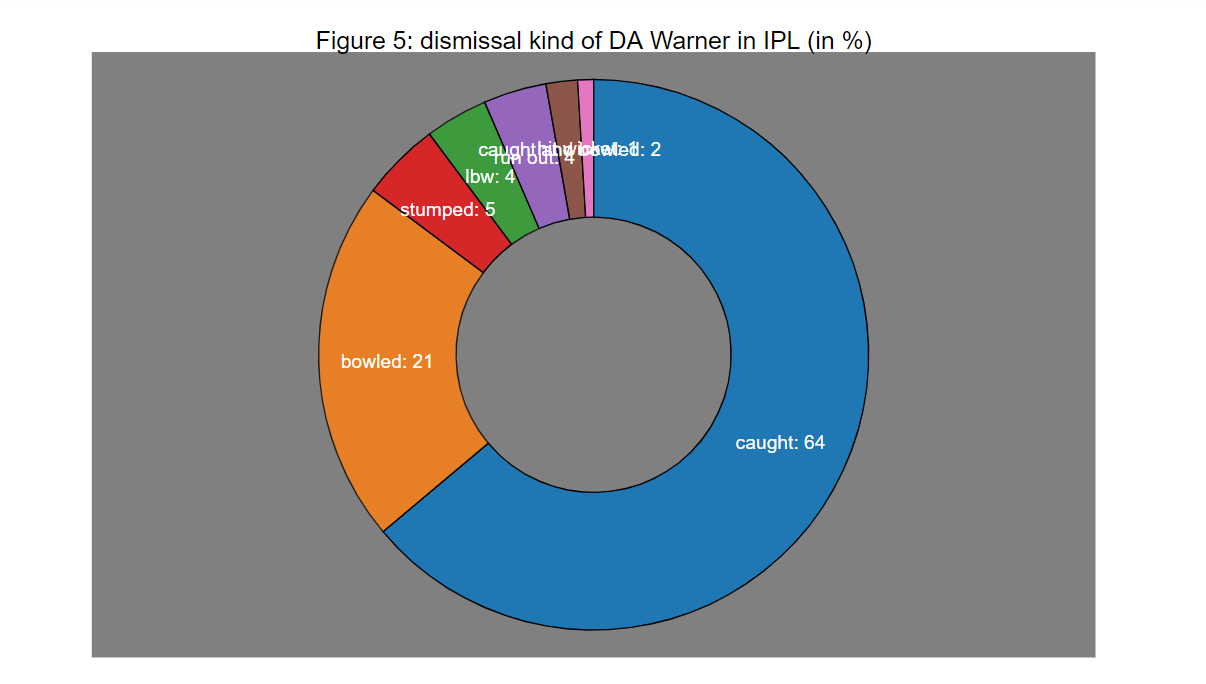

## 3.2 Against RR bowlers

In [99]:
# SRH batsman 'DA Warner'
DW1  = deliveries[(deliveries.batsman == 'DA Warner') & (deliveries.bowler.isin(RR_bowlers))]
DW1.player_dismissed.fillna(0, inplace = True)
DW_matches1 =len(DW1.match_id.unique()) # number of matches played by DA Warner(126)
DW_1 = DW1[DW1.player_dismissed == 'DA Warner']
DW_out_matches1 = DW_1.shape[0] #Number of times DA Warner got out in a match(108)
DW_1[['match_id', 'batsman', 'bowler', 'dismissal_kind' ]]

,match_id,batsman,bowler,dismissal_kind
5866,25,DA Warner,JD Unadkat,bowled
10148,43,DA Warner,BA Stokes,caught
166632,11144,DA Warner,BA Stokes,caught


In [100]:
DW_out_p1 = (DW_out_matches1/DW_matches1)*100 # DA Warner's out percentage
print("Total out percentage of DA Warner among the matches he played against RR bowlers: ", DW_out_p)
print("###############################################################################################################")
percentage1 = []
dismissal_kind1 = []
for i in DW_1.dismissal_kind.unique():
    w1 = (DW_1[DW_1.dismissal_kind == i].shape[0]/DW_out_matches1)*100
    percentage1.append(w1)
    dismissal_kind1.append(i)
    print("\nprint out percentage due to dismissal kind ", i, "is : ", w1)
    print("\n###############################################################################################################")

Total out percentage of DA Warner among the matches he played against RR bowlers:  85.71428571428571
###############################################################################################################

print out percentage due to dismissal kind  bowled is :  33.33333333333333

###############################################################################################################

print out percentage due to dismissal kind  caught is :  66.66666666666666

###############################################################################################################


In [101]:
from bqplot import Pie
from collections import Counter
from bqplot import DateScale, LinearScale, Lines, Axis, Figure
from bqplot import Tooltip

pie = Pie(sizes=list(percentage1), labels=list(dismissal_kind1),
          stroke="black",
          opacities = [1, 0.8, 0.8],
          radius=200, inner_radius=100,
          sort=True,
          display_values=True, values_format='0.0f',
          label_color="white", font_size="14px"
          )

fig = Figure(marks=[pie],
             legend_location = "bottom",
             title=" Figure 6: Dismissal kind of DA Warner against RR bowlers (in %)",
             fig_margin= dict(top=40, bottom=20, left=50, right=20),
             background_style = {"fill":"grey"}

      )

fig.layout.width="800px"
fig.layout.height="500px"

pie.tooltip = Tooltip(fields=['sizes'], labels=["Count"], formats=["0.1f"])

fig

Figure(background_style={'fill': 'grey'}, fig_margin={'top': 40, 'bottom': 20, 'left': 50, 'right': 20}, layou…

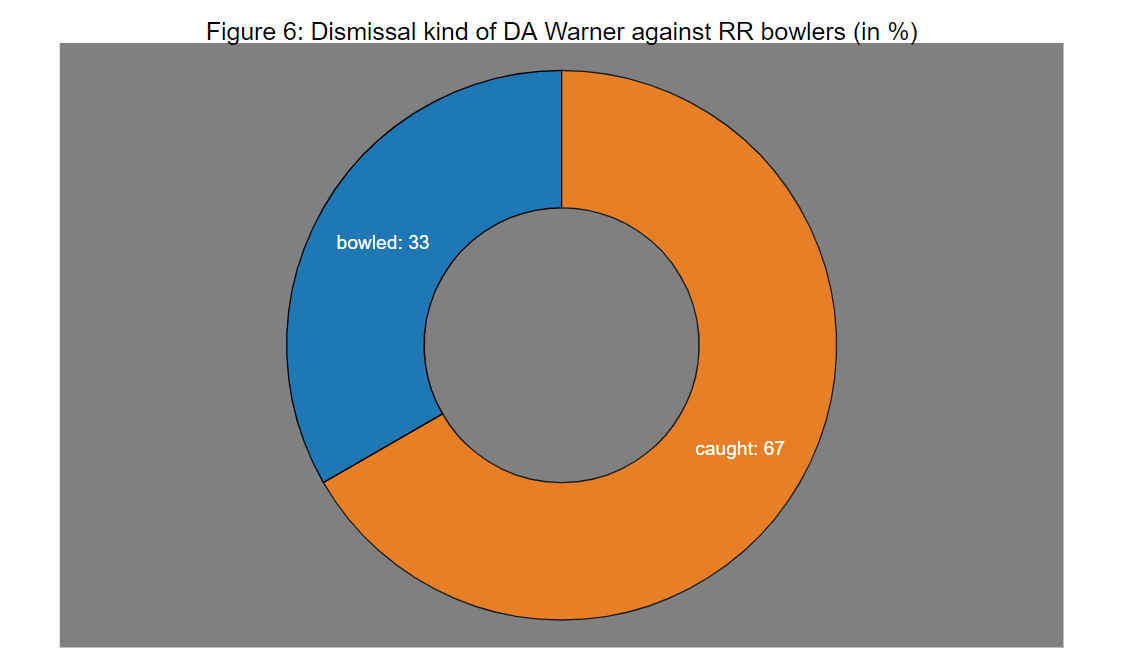

## DA Warner will get out of the match with "Caught" as a dismissal reason

# Question 4: Who will score most runs for RR in the match?

In [102]:
RR_batsmen

['RV Uthappa',
 'BA Stokes',
 'SV Samson',
 'SPD Smith',
 'JC Buttler',
 'R Tewatia',
 'J Archer',
 'R Parag']

## 4.1 RR batsmen overall performace matchwise

In [103]:
RR = deliveries[deliveries.batsman.isin(RR_batsmen)]
RR_bats = RR.groupby(["match_id","batsman"])["batsman_runs"].count().reset_index(name = "balls_faced")
RR1 = RR.groupby(["match_id","batsman"])["batsman_runs"].sum().reset_index(name = "runs_scored")
RR_bats["runs_scored"] = RR1.runs_scored
RR_bats["strike_rate"] = RR_bats.runs_scored *100/RR_bats.balls_faced


import numpy as np
import cufflinks as cf

print("List of Cufflinks Themes : ", cf.getThemes())
for count,i in enumerate(RR_bats.batsman.unique(), 7):
    r = RR_bats[RR_bats.batsman == i].reset_index()
    r["index"] = r.index
    ti = "Figure "+ str(count) + " : Batting performance of " + i + " in IPL"
    cf.set_config_file(theme='pearl',sharing='public',offline=True)
    r.iplot(kind="bar",x = "index",
                  subplots=True,
                  sortbars=True,
                  keys = ["balls_faced","runs_scored", "strike_rate"],
                  title=ti,
                  theme="henanigans"
                  )


List of Cufflinks Themes :  ['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']


### Checkout the figure 7- 14 in a folder , if figure does not load

In [104]:
for i in RR_bats.batsman.unique():
    r = RR_bats[RR_bats.batsman == i].reset_index()
    print("#############################################################################################################")
    print(i)
    print("#############################################################################################################")
    print("Avg balls faced: ", r.balls_faced.mean(), "\nfrquent number of balls faced:\n", r.balls_faced.mode()[0:])
    print("_________________________________________________________________________")
    print("Avg runs scored: ", r.runs_scored.mean(),"| (median value)-> ", r.runs_scored.median(), "| max number of :", r.runs_scored.max())

#############################################################################################################
BA Stokes
#############################################################################################################
Avg balls faced:  15.40625 
frquent number of balls faced:
 0     2
1     3
2     9
3    26
dtype: int64
_________________________________________________________________________
Avg runs scored:  20.21875 | (median value)->  14.0 | max number of : 103
#############################################################################################################
JC Buttler
#############################################################################################################
Avg balls faced:  21.2 
frquent number of balls faced:
 0    9
dtype: int64
_________________________________________________________________________
Avg runs scored:  31.8 | (median value)->  28.0 | max number of : 96
###################################################################

## 4.2 Against SRH bowlers

In [105]:
RR_ = deliveries[(deliveries.batsman.isin(RR_batsmen)) & (deliveries.bowler.isin(SRH_bowlers))]
RR_bats_ = RR_.groupby(["match_id","batsman", "bowler"])["batsman_runs"].count().reset_index(name = "balls_faced")
RR1_ = RR_.groupby(["match_id","batsman", "bowler"])["batsman_runs"].sum().reset_index(name = "runs_scored")
RR_bats_["runs_scored"] = RR1_.runs_scored
RR_bats_["strike_rate"] = RR_bats_.runs_scored *100/RR_bats_.balls_faced

import numpy as np
import cufflinks as cf

print("List of Cufflinks Themes : ", cf.getThemes())
for c1,i in enumerate(RR_bats_.batsman.unique(),15):
    r1 = RR_bats_[RR_bats_.batsman == i].reset_index()
    r1["index"] = r1.index
    ti1 = "Figure "+ str(c1) +" : Batting performance of " + i + " in IPL against SRH bowlers"
    cf.set_config_file(theme='solar',sharing='public',offline=True)
    r1.iplot(kind="bar",x = "bowler",
                  subplots=True,
                  sortbars=True,
                  keys = ["balls_faced","runs_scored", "strike_rate"],
                  title=ti1,
                  theme="polar"
                  )

List of Cufflinks Themes :  ['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']


### Checkout the figure 16 -20 in a folder, if in case figure does not load

In [106]:
SRH_bowlers

['Sandeep Sharma',
 'K Ahmed',
 'Rashid Khan',
 'V Shankar',
 'Basil Thampi',
 'T Natarajan']

In [107]:
for i in RR_bats_.batsman.unique():
    r1 = RR_bats_[['batsman', 'bowler', 'balls_faced', 'runs_scored']][RR_bats_.batsman == i].reset_index()
    print("##############################################################################################")
    print(i)
    print("##############################################################################################")
       
    for i1 in r1.bowler.unique():
        r2 = r1[r1.bowler == i1]
        print("Avearge runs against",i1," : ", r2.runs_scored.mean() , " | max runs: ", r2.runs_scored.max())
        


##############################################################################################
BA Stokes
##############################################################################################
Avearge runs against T Natarajan  :  5.0  | max runs:  5
Avearge runs against Basil Thampi  :  15.0  | max runs:  29
Avearge runs against Rashid Khan  :  1.3333333333333333  | max runs:  2
##############################################################################################
SPD Smith
##############################################################################################
Avearge runs against Sandeep Sharma  :  8.333333333333334  | max runs:  12
Avearge runs against T Natarajan  :  7.0  | max runs:  7
Avearge runs against Basil Thampi  :  6.0  | max runs:  6
Avearge runs against Rashid Khan  :  5.333333333333333  | max runs:  8
Avearge runs against K Ahmed  :  10.0  | max runs:  10
##############################################################################################


## Conclusion: JC Buttler might score highest runs for RR today.

# Question 5: How many no balls will be bowled in a match today? 

In [108]:
nb = deliveries[(deliveries.bowler.isin(RR_bowlers)) | (deliveries.bowler.isin(SRH_bowlers))]
match_count = []
bowler_name = []
for i in nb.bowler.unique():
    cb1 = nb[nb.bowler == i]
    bowler_name.append(i)
    match_count.append(len(cb1.match_id.unique()))

nb_rr_srh = pd.DataFrame(list(zip(bowler_name, match_count)), 
               columns =['match_id', 'matches_played'])
nb_rr_srh1 = nb.groupby(['bowler'])['noball_runs'].sum().reset_index(name = "no_balls")
m1 = [23, 30, 19, 21, 72, 10, 18, 46, 30, 68, 6,10]
nb_rr_srh1["number_of_matches_played"] = m1
nb_rr_srh1["percentage_noballs_bowled"] = (nb_rr_srh1.no_balls/nb_rr_srh1.number_of_matches_played)*100


In [109]:
from bqplot import Pie
from collections import Counter
from bqplot import DateScale, LinearScale, Lines, Axis, Figure
from bqplot import Tooltip

pie = Pie(sizes=list(nb_rr_srh1.percentage_noballs_bowled.values), labels=list(nb_rr_srh1.bowler.values),
          stroke="black",
          opacities = [0.8, 0.8, 0.8],
          radius=180, inner_radius=80,
          sort=True,
          display_values=True, values_format='0.0f',
          label_color="white", font_size="12px"
          )

fig = Figure(marks=[pie],
             legend_location = "top",
             title=" Figure 21: Number of no balls bowled by RR and SRH bowlers in IPL (in %)",
             fig_margin= dict(top=60, bottom=40, left=50, right=20),
             background_style = {"fill":"black"}

      )

fig.layout.width="800px"
fig.layout.height="500px"

pie.tooltip = Tooltip(fields=['sizes'], labels=["Count"], formats=["0.1f"])

fig

Figure(background_style={'fill': 'black'}, fig_margin={'top': 60, 'bottom': 40, 'left': 50, 'right': 20}, layo…

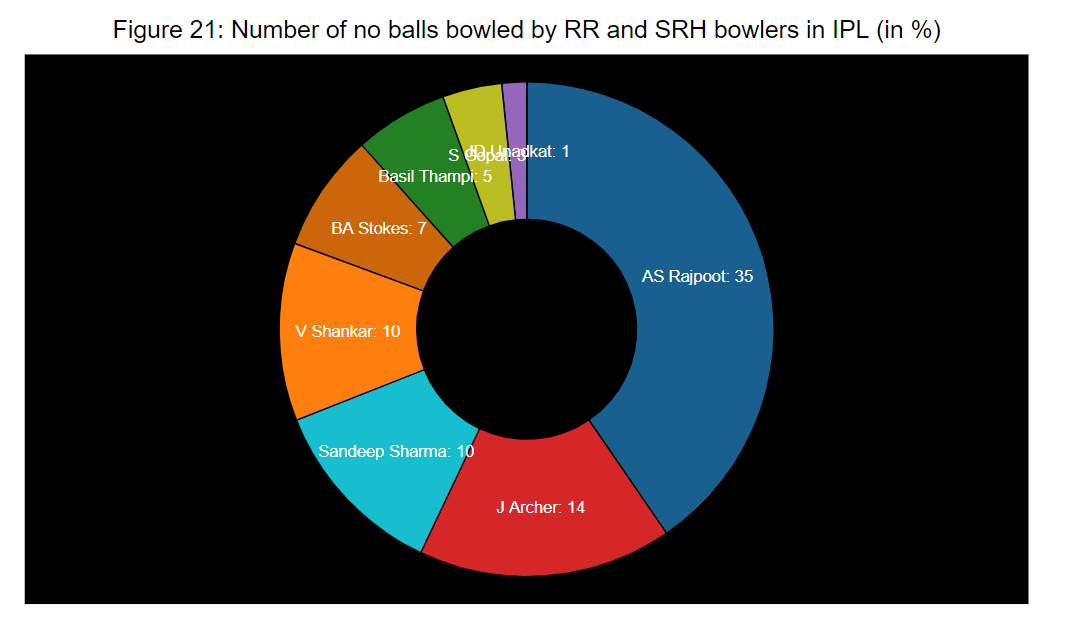

In [110]:
nb_rr_srh1

,bowler,no_balls,number_of_matches_played,percentage_noballs_bowled
0,AS Rajpoot,8,23,34.782609
1,BA Stokes,2,30,6.666667
2,Basil Thampi,1,19,5.263158
3,J Archer,3,21,14.285714
4,JD Unadkat,1,72,1.388889
5,K Ahmed,0,10,0.000000
6,R Tewatia,0,18,0.000000
7,Rashid Khan,0,46,0.000000
8,S Gopal,1,30,3.333333
9,Sandeep Sharma,7,68,10.294118


## Number of no-balls bowled in match would be 0-1

# Question 1: Who will win the match?

In [111]:
RR_SRH = matches[((matches.team1 == "Rajasthan Royals") & (matches.team2 == "Sunrisers Hyderabad")) | ((matches.team2 == "Rajasthan Royals") & (matches.team1 == "Sunrisers Hyderabad"))]

win_SC = pd.DataFrame(RR_SRH['winner'].value_counts())
win_SC['Team_name'] = win_SC.index
win_SC

color_ = ['LightBlue', 'Yellow']
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(8,5)

plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.bar(win_SC['Team_name'], win_SC['winner'], color=color_, alpha=0.8)

    
plt.title('Number of Wins by SRH and RR',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Count for total number of matches won',fontsize=14)
plt.show()

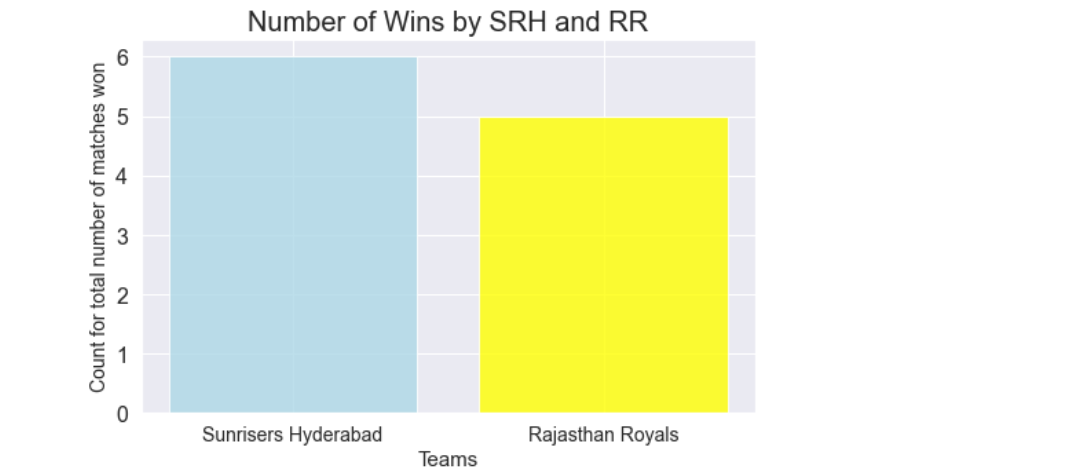

In [112]:
venue = "Dubai International Cricket Stadium"
RR = matches[((matches.team1 == "Rajasthan Royals") | (matches.team2 == "Rajasthan Royals"))]
RR[RR.venue == venue]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN


In [113]:
venue = "Dubai International Cricket Stadium"
SRH = matches[((matches.team1 == "Sunrisers Hyderabad") | (matches.team2 == "Sunrisers Hyderabad"))]
SRH[SRH.venue == venue]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


### venue wise details won't help us here, as there is a difference in players

## Hence , by looking at individual performances RR will be the winner today